<a href="https://colab.research.google.com/github/Raden616Rizki/PCVK_Ganjil_2023/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A. TUGAS PRAKTIKUM**

---

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

**Face Detection**

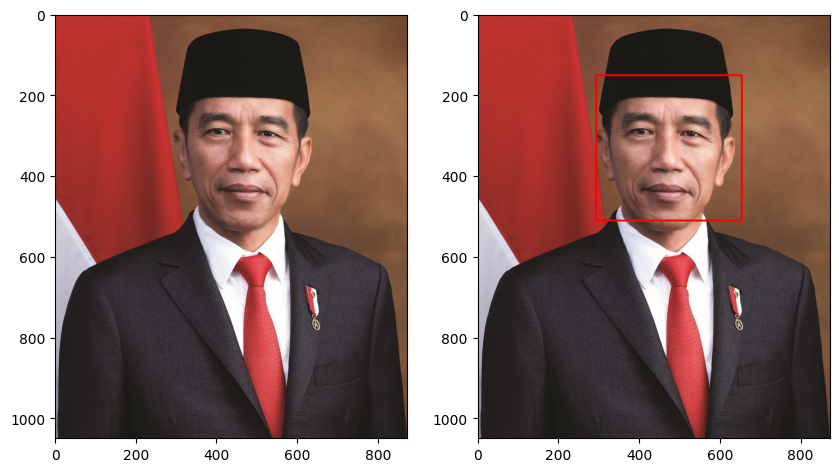

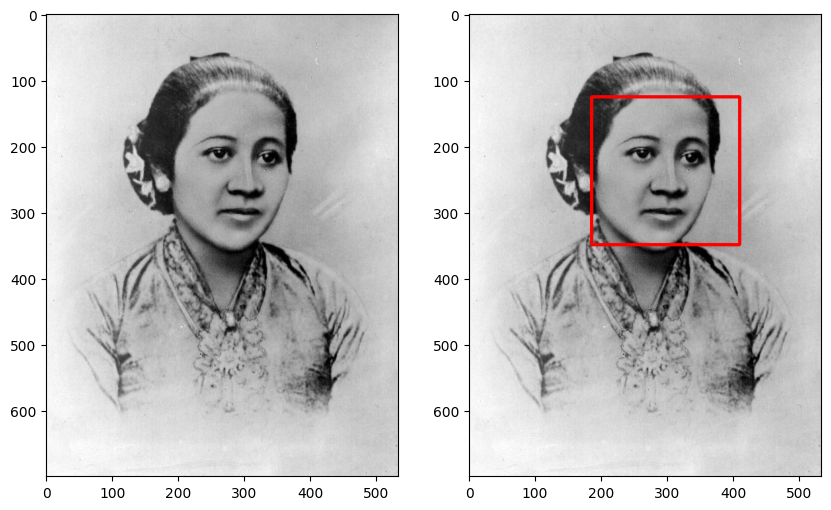

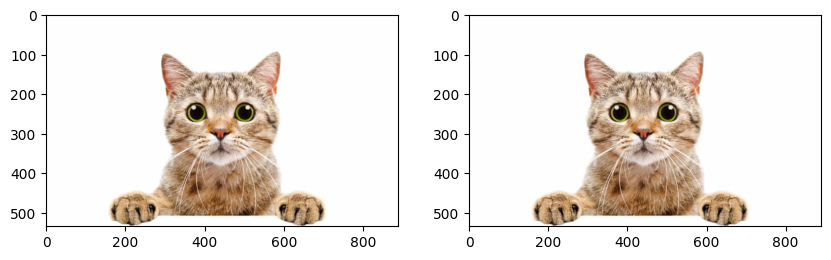

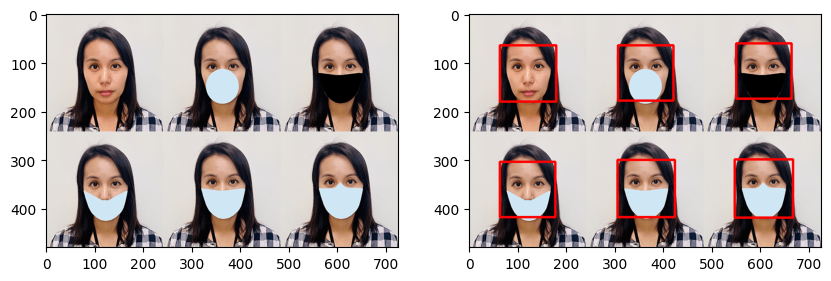

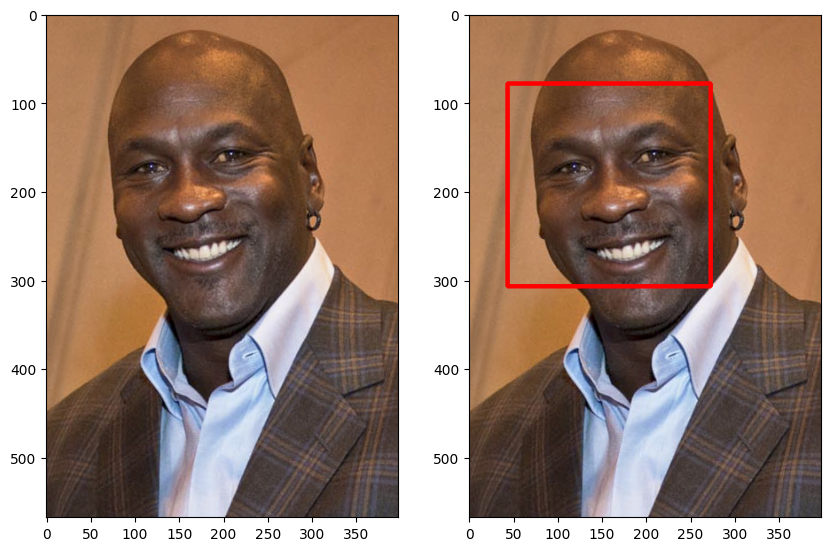

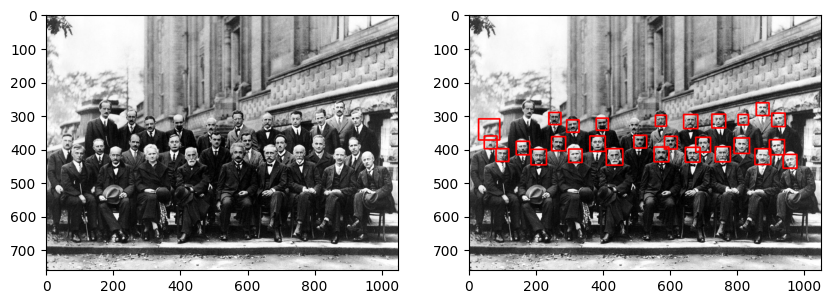

In [6]:
def detect_face(img, cascade):
  cascade_wajah = cv.CascadeClassifier(cascade)
  img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  img_1 = img_rgb.copy()
  roi_wajah = cascade_wajah.detectMultiScale(img_1)

  for(x,y,w,h) in roi_wajah:
    cv.rectangle(img_1,(x,y),(x+w,y+h),(255,0,0), 4)

  plt.figure(figsize = (10,10))
  plt.subplot(121), plt.imshow(img_rgb)
  plt.subplot(122), plt.imshow(img_1)

path = '/content/drive/MyDrive/Images/facedet/'
list_face = ['jokowi.jpg', 'kartini.jpg', 'kucing.jpg', 'mask.png', 'mjordan.jpg', 'solvayconf.jpg']

for name_file in list_face:
  img = cv.imread(os.path.join(path, name_file))
  cascade = '/content/drive/MyDrive/Images/haarcascades/haarcascade_frontalface_alt.xml'
  detect_face(img, cascade)

**Cat Face Detection**

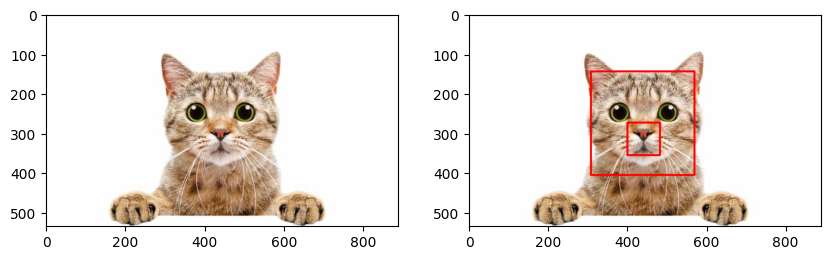

In [7]:
cat_image = cv.imread('/content/drive/MyDrive/Images/facedet/kucing.jpg')
cascade = '/content/drive/MyDrive/Images/haarcascades/haarcascade_frontalcatface.xml'
detect_face(cat_image, cascade)

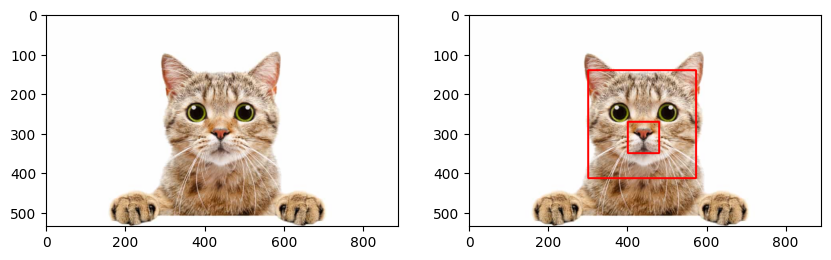

In [8]:
cat_image = cv.imread('/content/drive/MyDrive/Images/facedet/kucing.jpg')
cascade = '/content/drive/MyDrive/Images/haarcascades/haarcascade_frontalcatface_extended.xml'
detect_face(cat_image, cascade)

**Eyes Detection**

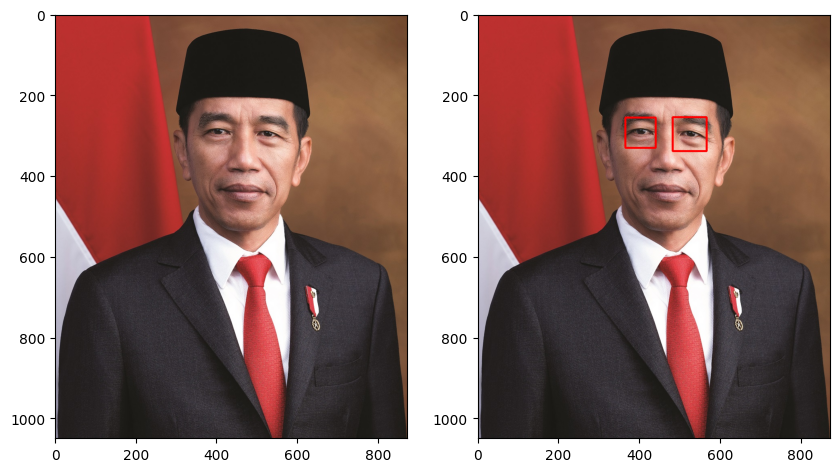

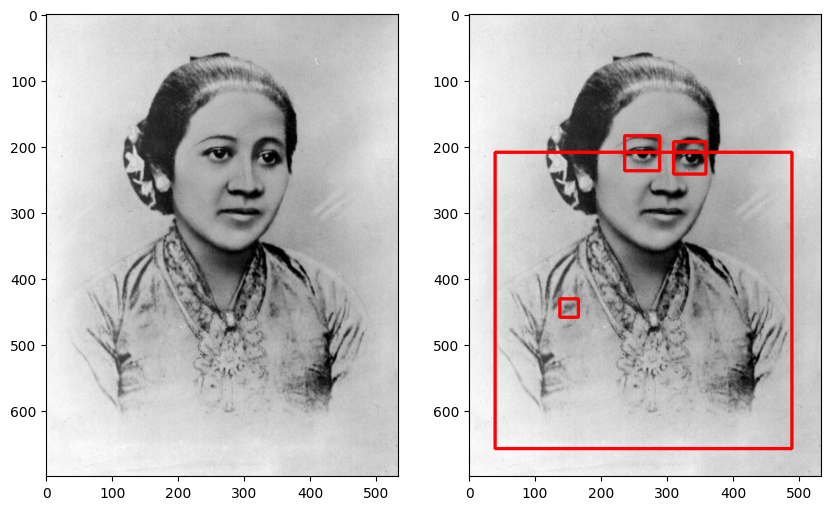

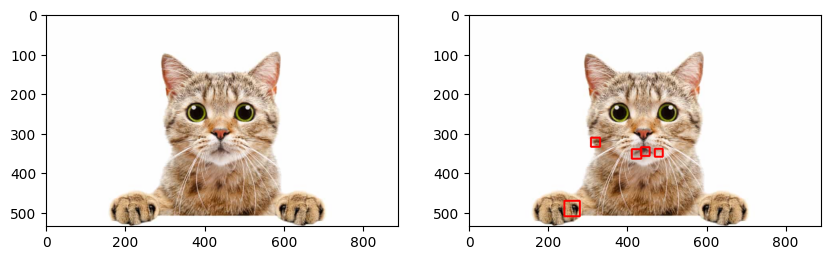

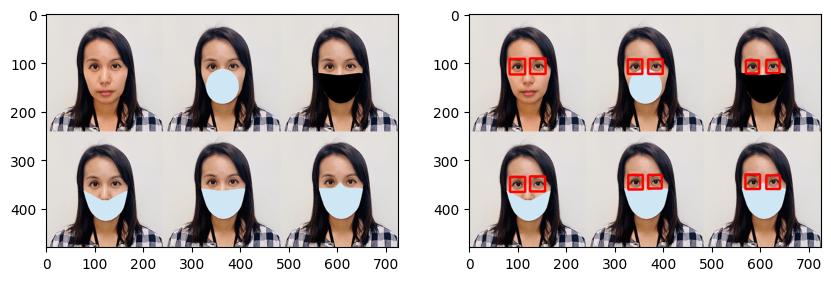

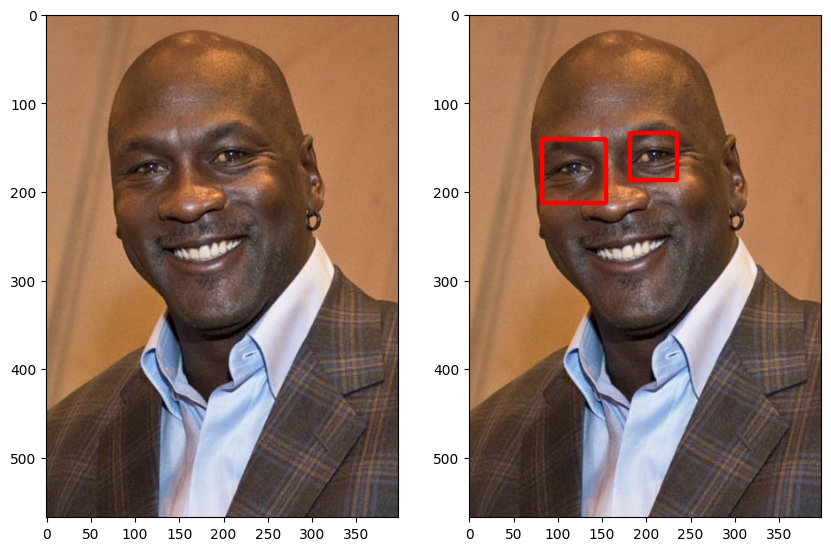

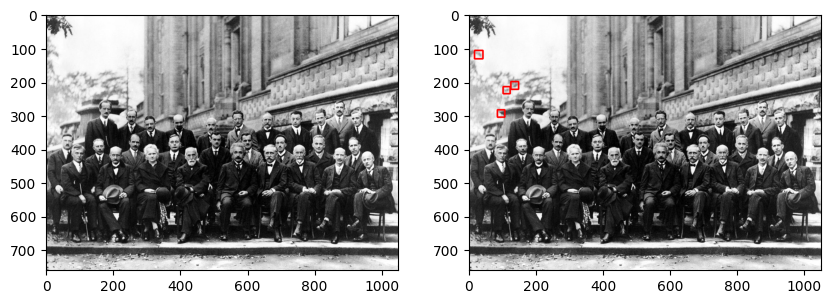

In [9]:
path = '/content/drive/MyDrive/Images/facedet/'
list_face = ['jokowi.jpg', 'kartini.jpg', 'kucing.jpg', 'mask.png', 'mjordan.jpg', 'solvayconf.jpg']

for name_file in list_face:
  img = cv.imread(os.path.join(path, name_file))
  cascade = '/content/drive/MyDrive/Images/haarcascades/haarcascade_eye.xml'
  detect_face(img, cascade)

**Face Tracking**

[How to Use Webcam In Google Colab for Images and Video (FACE DETECTION) | The AI Guy](https://www.youtube.com/watch?v=YjWh7QvVH60)

In [10]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import time

In [11]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [12]:
# initialize the Haar Cascade face detection model
face_cascade = cv.CascadeClassifier(cv.samples.findFile(cv.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [13]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


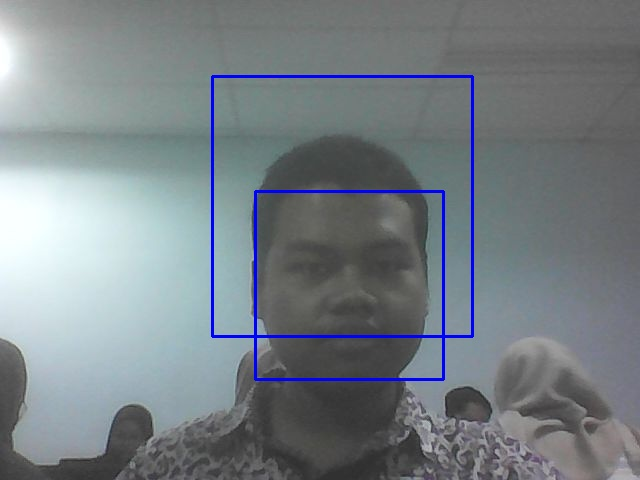

In [17]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [15]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [19]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

Result


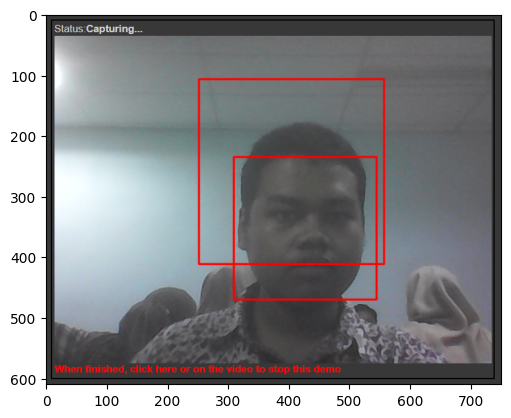

In [22]:
print('Result')
img = cv.imread('/content/drive/MyDrive/Images/result_face_tracking.png')
img_1 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img_1)

**Face Blurring**

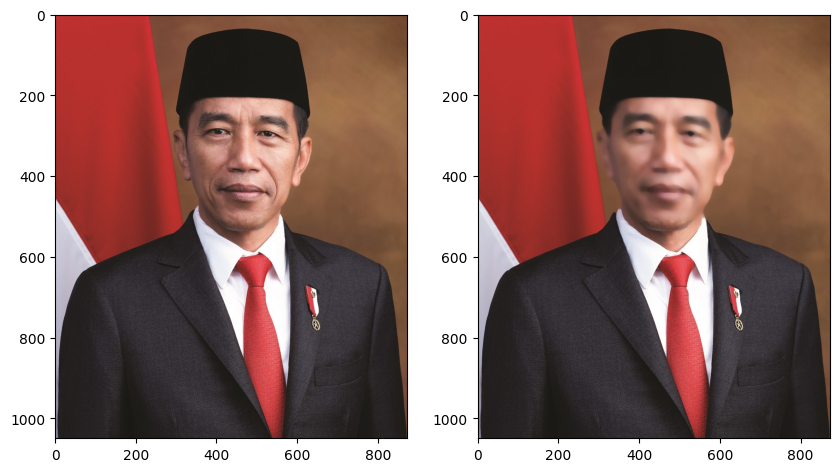

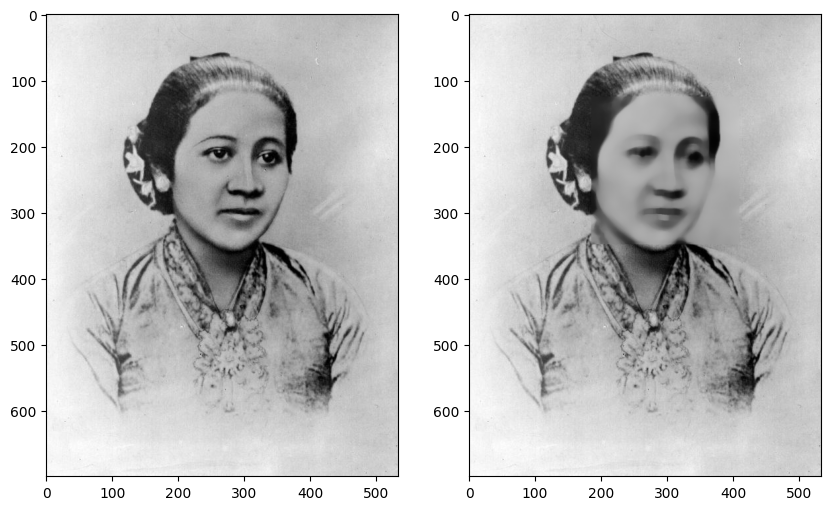

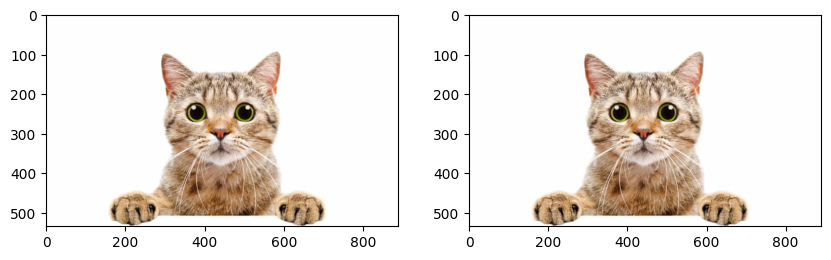

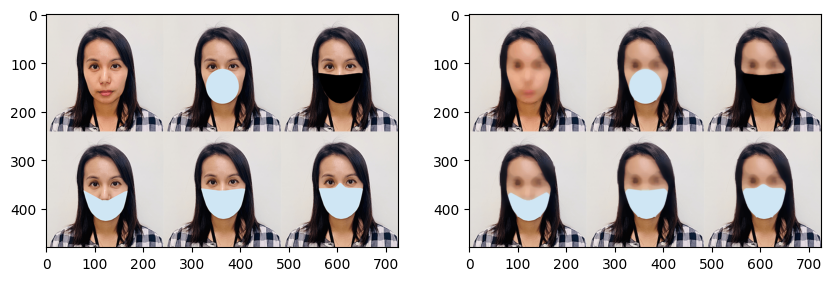

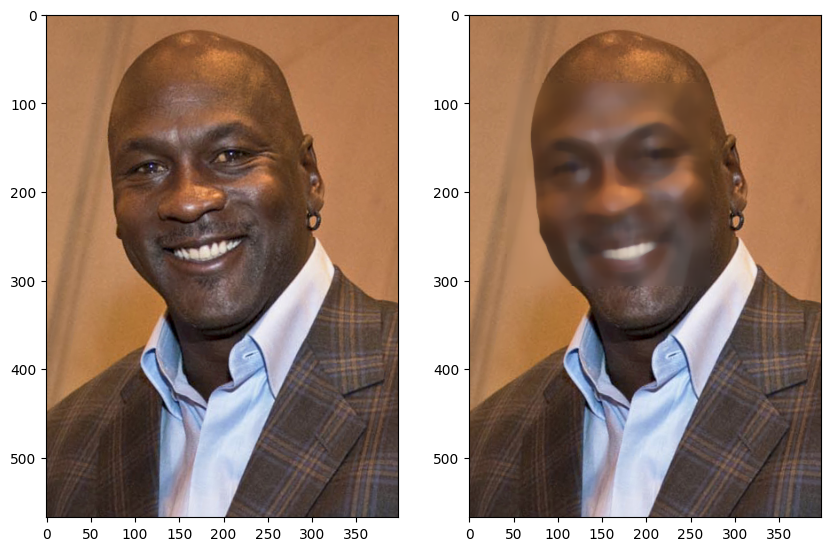

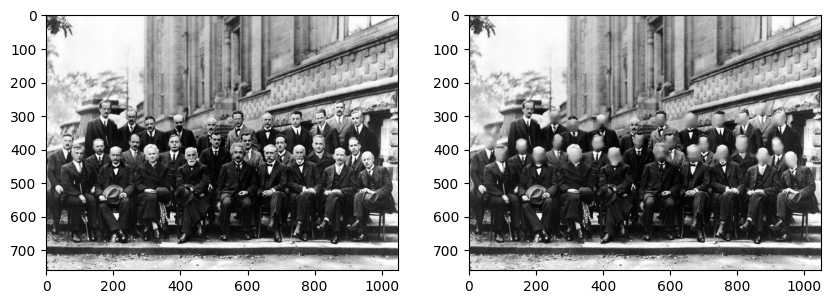

In [29]:
def blur_face(img):
  cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/Images/haarcascades/haarcascade_frontalface_alt.xml')
  img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  img_1 = img_rgb.copy()
  roi_wajah = cascade_wajah.detectMultiScale(img_1)

  for(x,y,w,h) in roi_wajah:
    roi = img_1[y:y+h, x:x+w]
    blur = cv.medianBlur(roi, 15)
    img_1[y:y+h, x:x+w] = blur

  plt.figure(figsize = (10,10))
  plt.subplot(121), plt.imshow(img_rgb)
  plt.subplot(122), plt.imshow(img_1)

path = '/content/drive/MyDrive/Images/facedet/'
list_face = ['jokowi.jpg', 'kartini.jpg', 'kucing.jpg', 'mask.png', 'mjordan.jpg', 'solvayconf.jpg']

for name_file in list_face:
  img = cv.imread(os.path.join(path, name_file))
  blur_face(img)

**Segmentasi Karakter KTP**

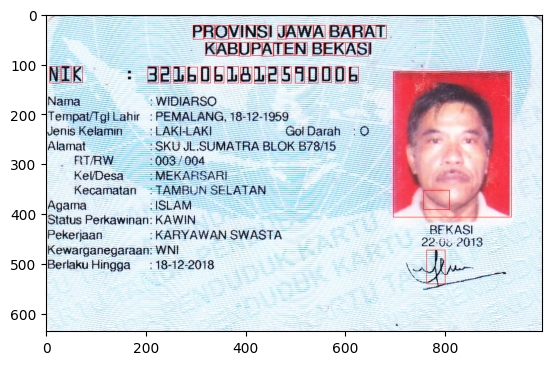

In [39]:
ktp = cv.imread('/content/drive/MyDrive/Images/KTP_More/ktp6.png')

blurred = cv.GaussianBlur(ktp, (21,21), 0.5)

sharpened2 = cv.addWeighted(ktp, 1.5, blurred,-0.5,0)

gray2 = cv.cvtColor(sharpened2, cv.COLOR_BGR2GRAY)

ret2, bw2 = cv.threshold(gray2, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
kernel = np.ones((2,2),np.uint8)

morphology = cv.morphologyEx(bw2, cv.MORPH_CLOSE, kernel)

contours2, _ = cv.findContours(morphology, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

for contour in contours2:
  x, y, w, h = cv.boundingRect(contour)
  if(w>16 and h>24):
    result2 = cv.rectangle(ktp, (x, y), (x+w, y+h),(0,0,255),1)

result3 = cv.cvtColor(result2, cv.COLOR_BGR2RGB)

plt.imshow(result3)

**Cropping NIK KTP**

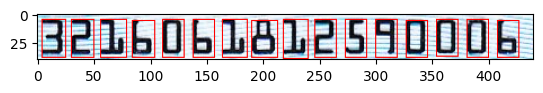

In [40]:
start_x = 200
start_y = 100
end_x = 640
end_y = 140

nik = result3[start_y:end_y, start_x:end_x]
plt.imshow(nik)

**Training Preprocessing**

In [45]:
from tqdm import tqdm
import random
import pickle

# Direktori data training
DATADIR = "/content/drive/MyDrive/Images/ktp_number/dataset/training/"
dirs = []
training_data = []
width, height = 100, 100

# Looping direktori data training untuk diambil nama karakternya
for char_name in sorted(os.listdir(DATADIR)):
  dirs.append(char_name)

# Looping semua image data training untuk diubah menjadi array
for char_name in dirs:
  path = os.path.join(DATADIR, char_name)
  class_number = dirs.index(char_name)
  for img in tqdm(os.listdir(path)):
    try:
      img_array = cv.imread(os.path.join(data_dir_testing, car, char_image), cv.IMREAD_ANYCOLOR)
      new_array = cv.resize(img_array, (width, height))
      training_data.append([new_array, class_number])
    except Exception as e:
      pass

random.shuffle(training_data)
X = []
Y = []

for feature, label in training_data:
  X.append(feature)
  Y.append(label)

X = np.array(X).reshape(-1, width, height, 1)

# Tulis ke file pickle
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()
pickle_out = open("Y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

100%|██████████| 1/1 [00:00<00:00, 13981.01it/s]
